# Week 3 Box Jenkins Models
## Time Series Analysis
### Earnest Salgado
### ID 12285784

In [1]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd
import seaborn as sns
sns.set()

from sklearn.preprocessing import StandardScaler

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

import warnings
warnings.filterwarnings('ignore')

## 1. 30 pts - Regression Analysis

### 1.A - 5 pts Perform EDA (numerical, visual, descriptive)

In [2]:
df = pd.read_csv('hw3_data.csv', parse_dates = ['date'])

In [3]:
df

,date,gdp,urate
0,1948-01-01,265.742,3.4
1,1948-04-01,272.567,3.9
2,1948-07-01,279.196,3.6
3,1948-10-01,280.366,3.7
4,1949-01-01,275.034,4.3
...,...,...,...
287,2019-10-01,21747.394,3.6
288,2020-01-01,21561.139,3.5
289,2020-04-01,19520.114,14.8
290,2020-07-01,21170.252,10.2


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
gdp,292.0,6481.725808,6487.790355,265.742,802.66925,4046.9255,11011.904,21747.394
urate,292.0,5.779110,1.743680,2.600,4.50000,5.6000,6.825,14.800


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    292 non-null    datetime64[ns]
 1   gdp     292 non-null    float64       
 2   urate   292 non-null    float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 7.0 KB


In [6]:
df.isnull().sum()

date     0
gdp      0
urate    0
dtype: int64

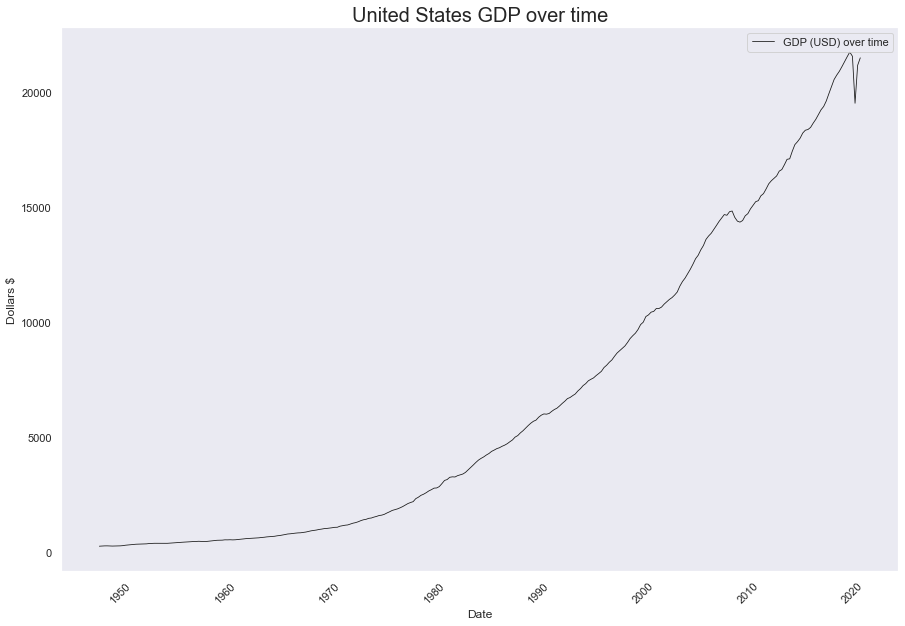

In [7]:
x = df['date']
#x = pd.to_datetime(x)

y = df['gdp']
# z = df['urate']

plt.figure(figsize=(15,10))  
plt.plot(x, y, color = 'k',label = "GDP (USD) over time", ls = '-', lw = 0.8)
#plt.plot(x, z, color = 'g',label = "SPY Price over time", ls = '-', lw = 0.8)

plt.xticks(rotation = 45)
plt.xlabel('Date')
plt.ylabel('Dollars $')
plt.title('United States GDP over time', fontsize = 20)
plt.grid()
plt.legend()
plt.show()

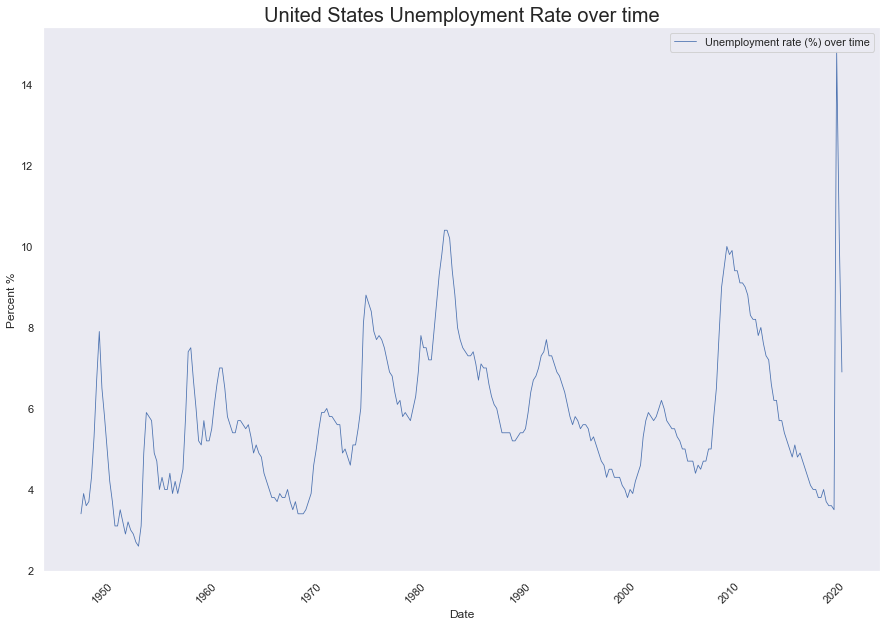

In [8]:
x = df['date']
z = df['urate']

plt.figure(figsize=(15,10))  
plt.plot(x, z, color = 'b',label = "Unemployment rate (%) over time", ls = '-', lw = 0.8)

plt.xticks(rotation = 45)
plt.xlabel('Date')
plt.ylabel('Percent %')
plt.title('United States Unemployment Rate over time', fontsize = 20)
plt.grid()
plt.legend()
plt.show()

In [9]:
# correlation table with all the numeric features
df.corr()

,gdp,urate
gdp,1.00000,0.14432
urate,0.14432,1.00000


<AxesSubplot:>

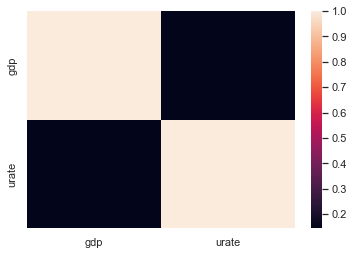

In [10]:
# heatmap based on the correlation table from above
sns.heatmap(df.corr())

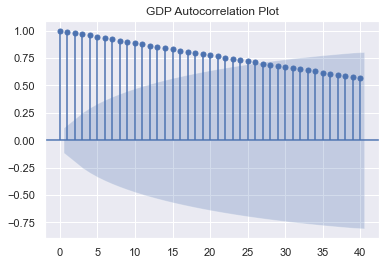

In [11]:
p = plot_acf(df['gdp'], lags=40, title='GDP Autocorrelation Plot')

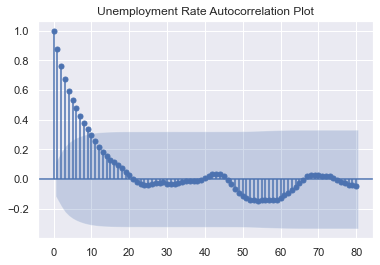

In [52]:
p = plot_acf(df['urate'], lags=80, title='Unemployment Rate Autocorrelation Plot')

### 1.B - 5 pts What is Okun’s Law? Does our dataset fit what we would expect to see? Why or why not?
- Okun's law looks at the statistical relationship between a country's unemployment and economic growth rates. Okun's law says that a country's gross domestic product (GDP) must grow at about a 4% rate for one year to achieve a 1% reduction in the rate of unemployment.


### 1.C - 5 pts Create a column that shows GDP change as a percentage and a column that shows UE rate as a change in percentage points. For date 4/1/1948 GDP change = 2.568, UE diff = 0.5

In [13]:
# set date as index
df.set_index('date', inplace = True)
# create new columns
df['gdp_pct_change'] = df['gdp'].pct_change()*100
df['urate_pct_pt_chg'] = df['urate'].diff()

df.head(len(df))
print(df.dtypes)

gdp                 float64
urate               float64
gdp_pct_change      float64
urate_pct_pt_chg    float64
dtype: object


In [14]:
# drop first row since it has NaN
df.dropna(subset = ['gdp_pct_change', 'urate_pct_pt_chg'], how='any',inplace=True)
df

,gdp,urate,gdp_pct_change,urate_pct_pt_chg
date,,,,
1948-04-01,272.567,3.9,2.568281,0.5
1948-07-01,279.196,3.6,2.432063,-0.3
1948-10-01,280.366,3.7,0.419060,0.1
1949-01-01,275.034,4.3,-1.901800,0.6
1949-04-01,271.351,5.3,-1.339107,1.0
...,...,...,...,...
2019-10-01,21747.394,3.6,0.961309,0.0
2020-01-01,21561.139,3.5,-0.856447,-0.1
2020-04-01,19520.114,14.8,-9.466221,11.3


### 1.D - 5 pts Split into Train/test ( ) and create a scatterplot, verifying the negative relationship in Okun’s law.

In [18]:
from sktime.forecasting.all import temporal_train_test_split
y_train, y_test = temporal_train_test_split(df)

In [19]:
y_train.index.min(), y_train.index.max()
y_test.index.min(), y_test.index.max()

(Timestamp('2002-10-01 00:00:00'), Timestamp('2020-10-01 00:00:00'))

In [20]:
print(y_train.shape)
print(y_test.shape)

(218, 4)
(73, 4)


gdp                -0.031490
urate               0.127573
gdp_pct_change     -0.528613
urate_pct_pt_chg    1.000000
Name: urate_pct_pt_chg, dtype: float64


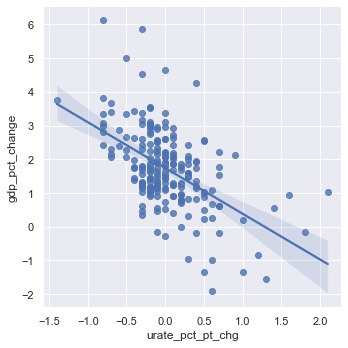

In [21]:
#df.plot.scatter(x='date', y='gdp', c='DarkBlue', title='GDP Over Time')
sns.lmplot(data = y_train, x = 'urate_pct_pt_chg', y = 'gdp_pct_change')
print(y_train.corr()['urate_pct_pt_chg'])

### 1.E - 5 pts Fit a linear model on the Training set. State Okun’s law using your data e.g. interpret the coefficients.

In [31]:
#from sklearn.linear_model import LinearRegression
#X = y_train['urate_pct_pt_chg'].values
#y = y_train['gdp_pct_change'].values

#lm = LinearRegression()
#lm_model = lm.fit(X.reshape(-1,1),y)

### 1.F - 5pts How can we use this model to predict level of GDP dollars in the future? What will we need, what are the resulting limitations?
- 

### Unfortunately, we have not yet learned how to fit Box-Jenkins models for multivariate time series. Thus, we will follow the Model identification procedure found in Week 3 slides for EACH of the economic time series in the dataset. Start with the original time series data: GDP in dollars and UE rate

## 2. 30 pts – Box Jenkins model for GDP
### 2.A - 7 pts Perform transformations or differencing until you can visually and statistically confirm stationarity on training set. Summarize the changes to your time series.

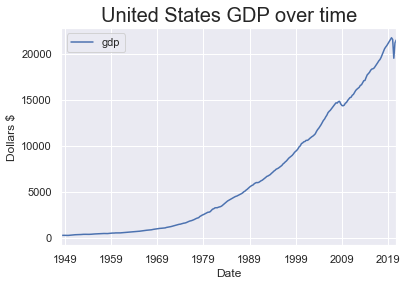

In [47]:
df['gdp'].plot()
plt.xlabel('Date')
plt.ylabel('Dollars $')
plt.title('United States GDP over time', fontsize = 20)
plt.legend()
plt.show()

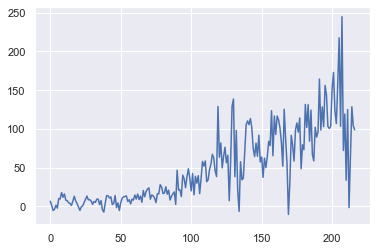

In [50]:
GDP_first_order = np.diff(y_train['gdp'])
plt.plot(GDP_first_order)

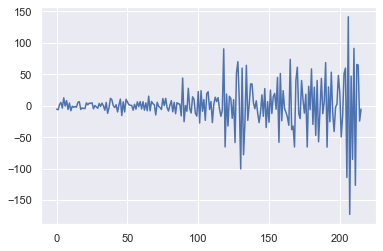

In [51]:
GDP_second_order = np.diff(GDP_first_order)
plt.plot(GDP_second_order)

In [ ]:
from statsmodels.tsa.stattools import kpss, adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from copy import deepcopy

def adf_test(timeseries):
    print ('Dickey-Fuller Test Result:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

#define KPSS
def kpss_test(timeseries, trend='c'):
    print ('KPSS Test Result:')
    kpsstest = kpss(timeseries, regression=trend)
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)

### 2.B - 7 pts Create and interpret ACF and PACF plots

### 2.C - 7 pts Fit an appropriate Box Jenkins model on training set

### 2.D - 7 pts Check residuals (scatter plot, histogram, ACF, portmanteau tests) Give a summary of your residuals.

### 2.E - 7 pts Print model evaluation metrics MAE, MSE, MAPE, sMAPE on test set

## 3. 35 pts – Box Jenkins model for Unemployment rate
### 3.A - 7 pts Perform transformations or differencing until you can visually and statistically prove stationarity on training set. Summarize the changes to your time series.

### 3.B - 7 pts Create and interpret ACF and PACF plots

### 3.C - 7 pts Fit an appropriate Box Jenkins model on training set

### 3.D - 7 pts Check residuals (scatter plot, histogram, ACF, portmanteau tests)  Give a summary of your residuals.

### 3.E - 7 pts Print model evaluation metrics MAE, MSE, MAPE, sMAPE on test set

## 4. 10 pts – Evaluation Compare the two models’ performance using the error metrics as evidence